In [ ]:
pip install scikit-learn==1.4.2

In [1]:
import sklearn
sklearn.__version__

'1.4.2'

In [2]:
# 📌 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso

In [7]:
# 🔄 Load CSV without auto-converting 'Yes'/'No' to NaN
df = pd.read_csv("/kaggle/input/student-score-dataset-2/student_score_dataset_1.csv", keep_default_na=False)
df.head()

,Gender,Hours_Studied,Previous_Exam_Score,Attendance,Sleep_Hours,Health_Issues,Extra_Curricular_Hours,Student_Score
0,Female,9.2,0.8,84.5,3.0,No,6.9,55.8
1,Female,11.3,1.6,54.4,8.2,Yes,3.7,63.4
2,Female,4.3,57.4,71.7,6.9,No,1.7,73.3
3,Male,3.2,34.9,55.1,4.7,No,13.6,45.7
4,Male,5.7,15.5,52.8,9.5,Yes,9.9,51.2


In [8]:
print(df.isnull().sum())

Gender                    0
Hours_Studied             0
Previous_Exam_Score       0
Attendance                0
Sleep_Hours               0
Health_Issues             0
Extra_Curricular_Hours    0
Student_Score             0
dtype: int64


In [9]:
# Label Encoding
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df["Health_Issues"] = df["Health_Issues"].map({"Yes": 1, "No": 0})
df.head()

,Gender,Hours_Studied,Previous_Exam_Score,Attendance,Sleep_Hours,Health_Issues,Extra_Curricular_Hours,Student_Score
0,0,9.2,0.8,84.5,3.0,0,6.9,55.8
1,0,11.3,1.6,54.4,8.2,1,3.7,63.4
2,0,4.3,57.4,71.7,6.9,0,1.7,73.3
3,1,3.2,34.9,55.1,4.7,0,13.6,45.7
4,1,5.7,15.5,52.8,9.5,1,9.9,51.2


In [10]:
# 🎯 Define Features and Target
X = df.drop("Student_Score", axis=1)
y = df["Student_Score"]


In [ ]:
df.head()

In [11]:
# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 🤖 Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# 📈 Predict and Evaluate
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr_model.predict(X_test)
# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred)

# 🔍 Print results
print(f"📊 Evaluation Metrics for Linear Regression:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


📊 Evaluation Metrics for Linear Regression:
Mean Absolute Error (MAE): 1.56
Mean Squared Error (MSE): 2.98
Root Mean Squared Error (RMSE): 1.73
R² Score: 0.9895


/tmp/ipykernel_131/1193554074.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


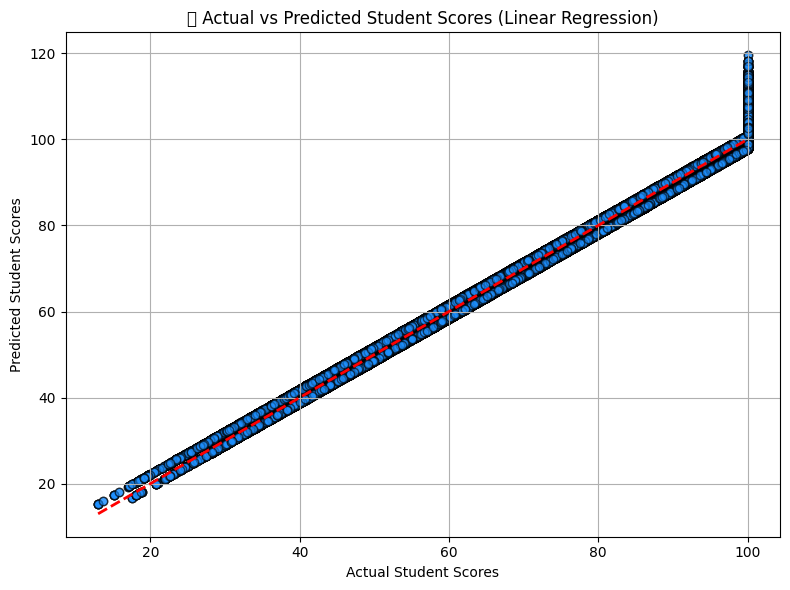

In [14]:
import matplotlib.pyplot as plt

# 📈 Predict with trained Linear Regression model
y_pred = lr_model.predict(X_test)

# 🎯 Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Student Scores")
plt.ylabel("Predicted Student Scores")
plt.title("📊 Actual vs Predicted Student Scores (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


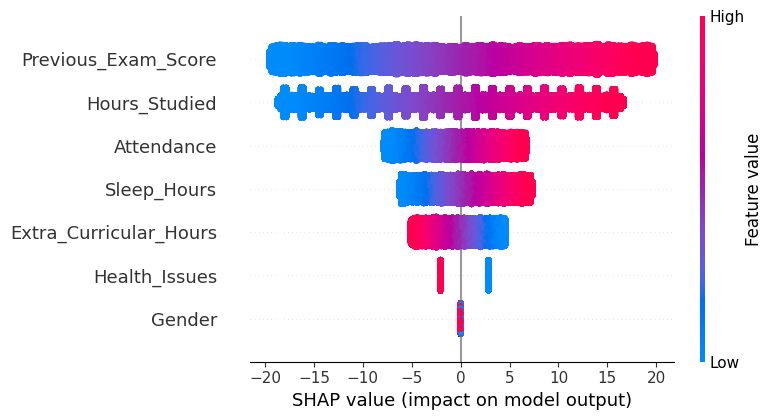

In [15]:
import shap
import numpy as np

# Initialize the SHAP explainer for linear model
explainer = shap.Explainer(lr_model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [18]:
# 💾 Save the trained model to a file

import pickle  # Add this line


with open("linear_regression_model2.pkl", "wb") as f:
    pickle.dump(lr_model, f)

print("✅ Linear Regression model saved as 'linear_regression_model2.pkl'")

✅ Linear Regression model saved as 'linear_regression_model2.pkl'
